# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike dataset

In [117]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [118]:
import numpy as np
import pandas as pd

In [119]:
day = pd.read_csv("day.csv", parse_dates=['dteday'])

In [120]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [121]:
#dropping dteday column as it is date
day.drop(['dteday'], axis=1, inplace=True)

In [122]:
#dropping instant column as it is id
day.drop(['instant'], axis=1, inplace=True)

Inspect the various aspects of the housing dataframe

In [123]:
day.shape

(730, 14)

In [124]:
# checking for null vlaues
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


- all the columns have no missing values, hence no need for NA imputation

In [125]:
# quantitative description of numeric columns
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- There is no abrupt or suspicious pattern observed indicating an outlier.
- The target variable `cnt` has mean 4508 and median 4548 suggesting very low probability of outliers. Similar is the case with other columns as well.


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

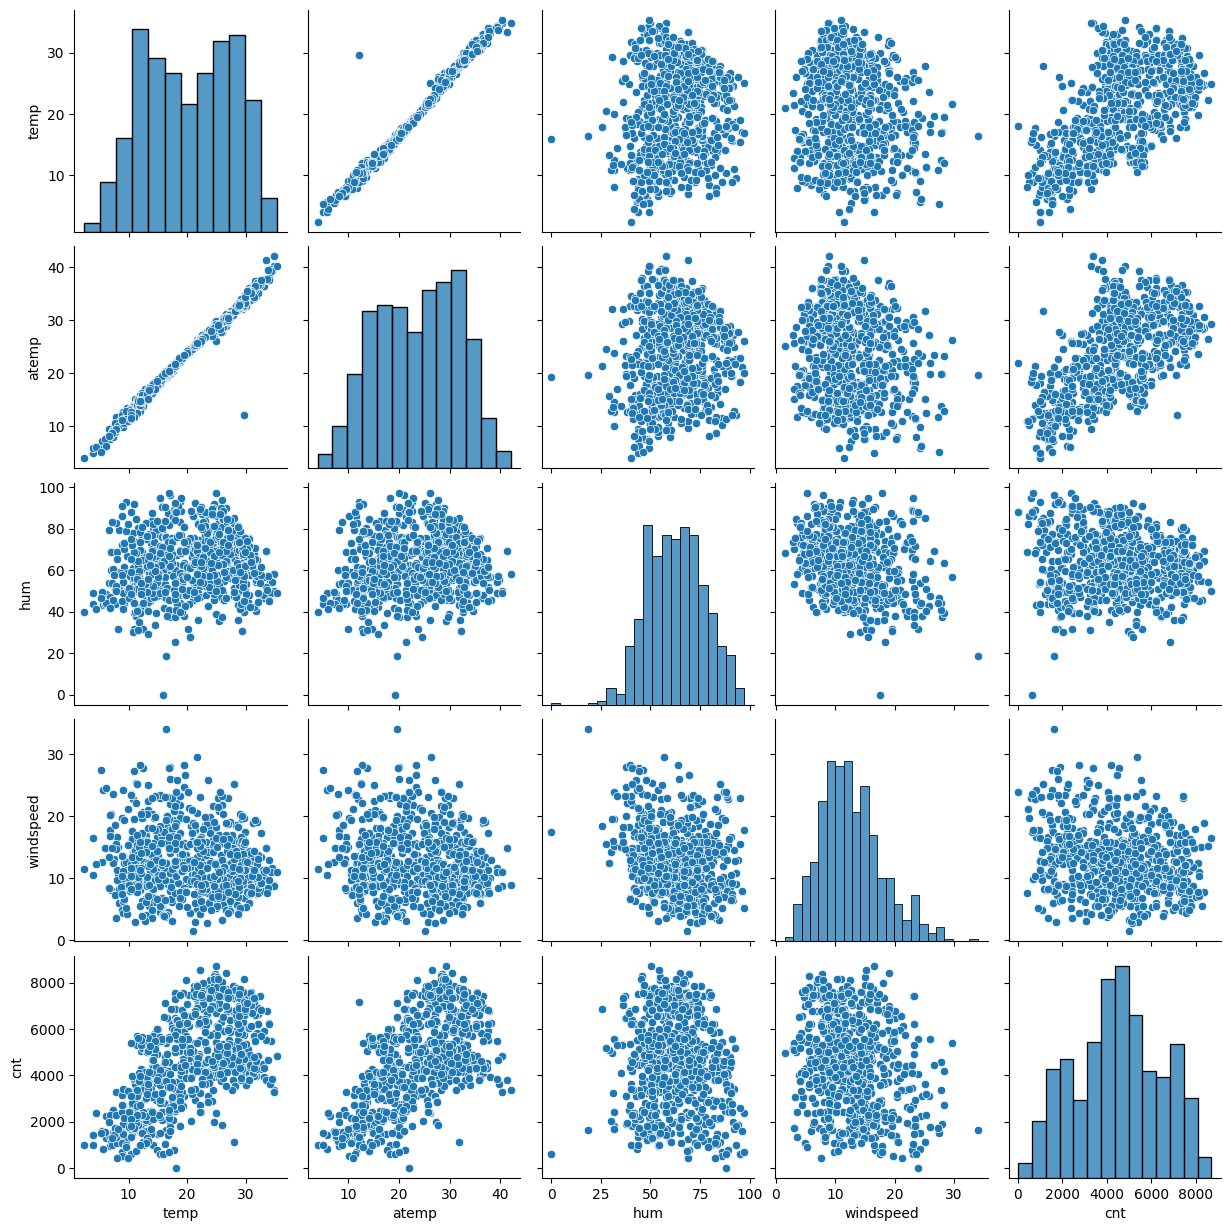

In [127]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.pairplot(day[num_vars])
plt.show()

- The pairplot above shows that `temp`, `atemp` show positive correlation with the target variable `cnt`.

Let's see the strength of correlation for these columns with `cnt`.

In [128]:
day[num_vars].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


* `temp` and `atemp` are highly correlated, which suspects the possibility of Multicollinearity.
Let's drop `temp` to avoid this issue.

The variable `casual` indicates the number casual users who have made a rental. The variable `registered` on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the `cnt` variable indicates the total number of bike rentals, including both casual and registered.

Since `cnt` is the target variable and `cnt` = `casual` + `registered`, it doesn't make sense to keep the other 2 columns as these features will drive the regression because they're components of `cnt`. Hence, we drop them.

In [129]:
day.drop(['casual', 'registered'], axis=1, inplace=True)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [130]:
cat_vars = ['season', 'weekday', 'weathersit']
cat_vars

['season', 'weekday', 'weathersit']

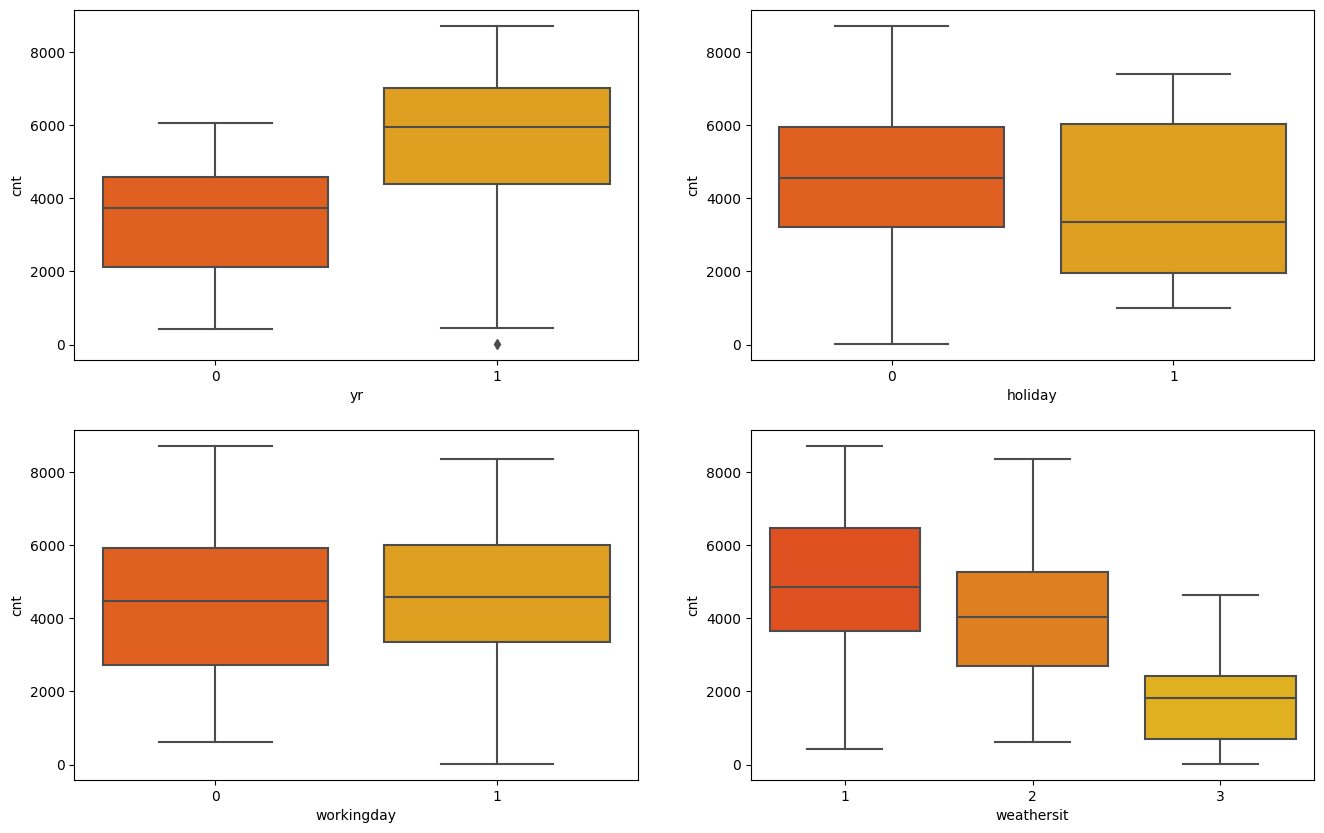

In [131]:
palette = 'autumn'

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day, palette=palette)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day, palette=palette)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day, palette=palette)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day, palette=palette)
plt.show()

- As seen, the demand has increased over the year.
- `workingday` doesn't matter much for `cnt`. However, `weathersit` influences a lot and we can see, `cnt` is high during Clear, Few clouds, Partly cloudy, Partly cloudy and decreases with Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

<AxesSubplot:xlabel='season', ylabel='cnt'>

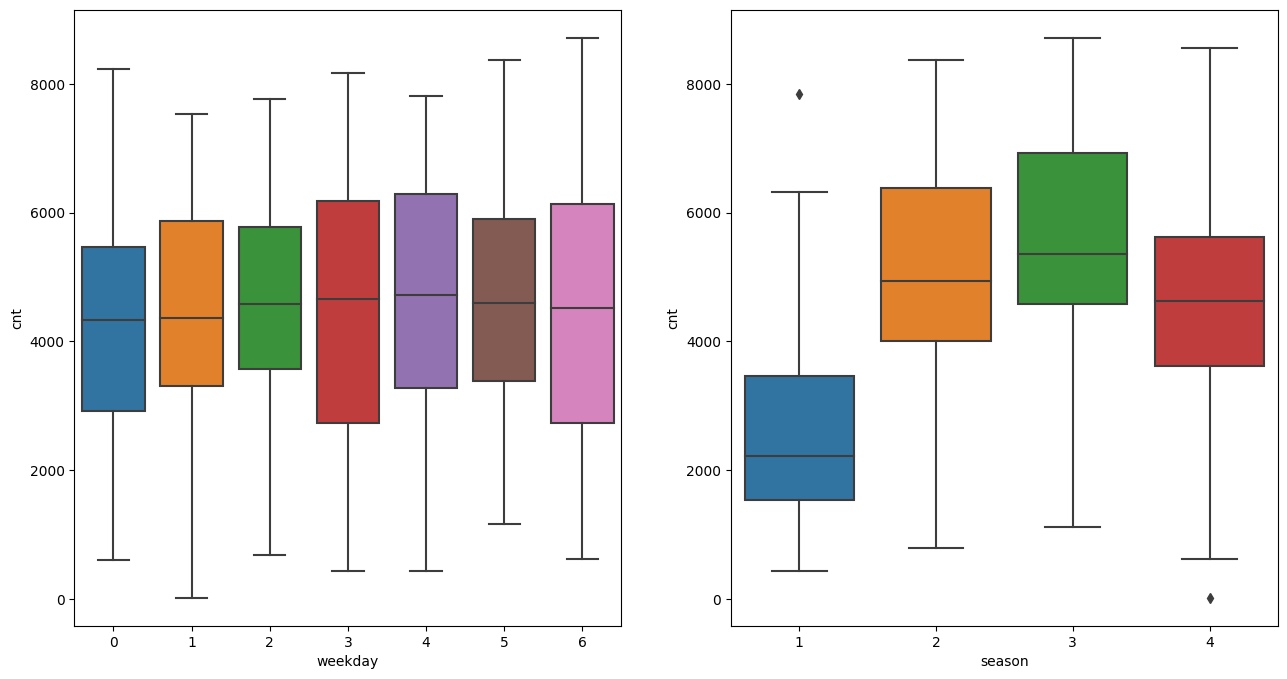

In [132]:
palette = 'spring'

plt.figure(figsize=(24, 8))

plt.subplot(1,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(1,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = day)

- During spring season, `cnt` is the lowest. 

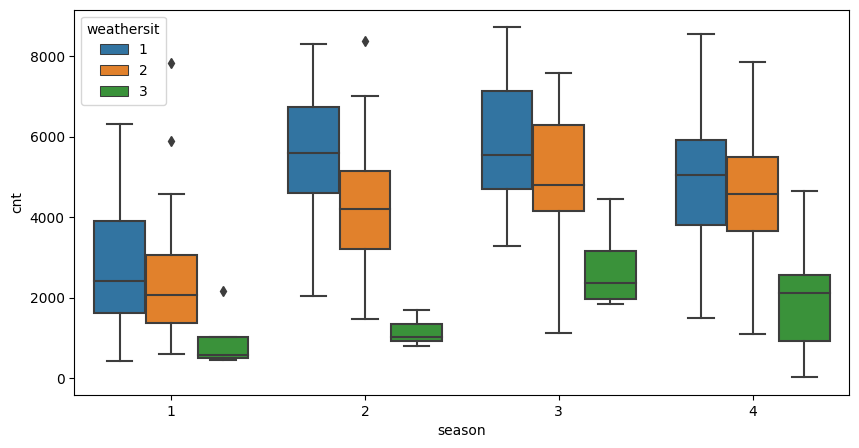

In [134]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

- The demand is consistently lower during the Spring season. But along with this weather, it's the lowest in the Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather.

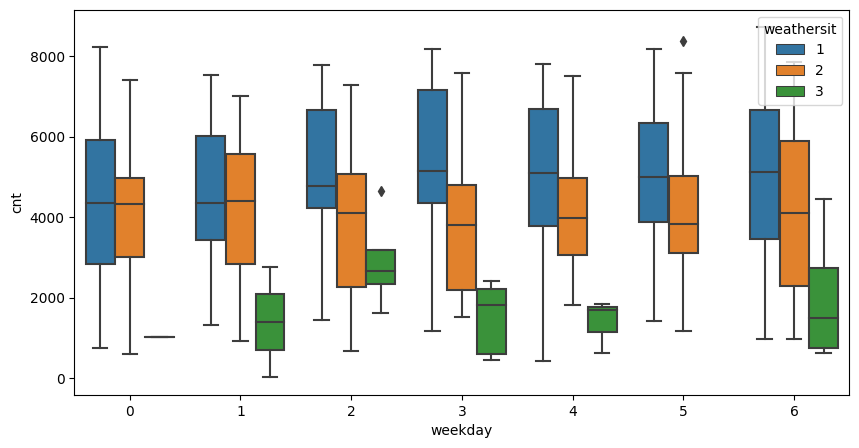

In [44]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

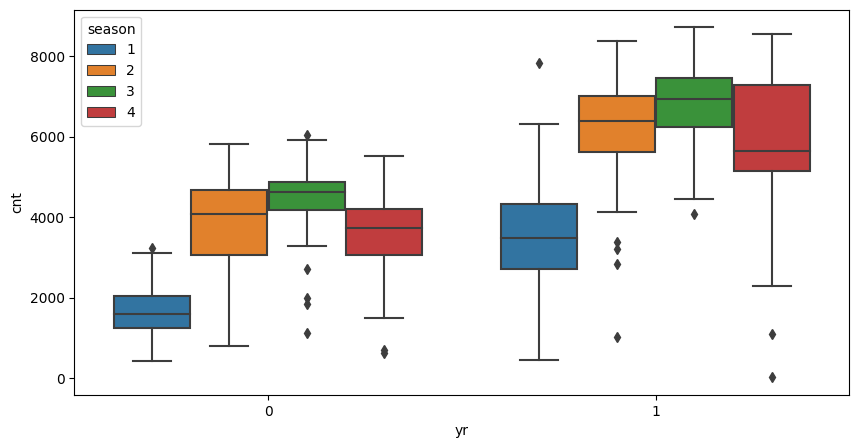

In [45]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'season', data = day)
plt.show()

## Step 3: Data Preparation

In [46]:
# checking dtypes for string columns
day.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Dummy Variables

In [47]:
# 'season', 'weekday', 'weathersit' and 'mnth' will be converted to dummy variables to avoid getting interpeted as ordinal features

multiple_cat_vars = ['season', 'weekday', 'weathersit', 'mnth']

day[multiple_cat_vars] = day[multiple_cat_vars].astype(str)

dummy_day = pd.get_dummies(day[multiple_cat_vars], drop_first=True, dtype=int)

In [48]:
# Check what the dataset 'status' looks like
dummy_day.head()

,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Add the results to the original housing dataframe

day = pd.concat([day, dummy_day], axis = 1)

In [53]:
# Now let's see the head of our dataframe.

day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping cat_vars as we have created the dummies for it

day.drop(multiple_cat_vars, axis = 1, inplace = True)

In [55]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 42)

In [57]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [58]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to numeric columns

num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
683,1,0,1,13.188347,0.322150,0.639330,0.327101,0.605336,0,0,...,1,0,0,0,0,0,0,0,0,0
645,1,1,0,15.716653,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,1,26.035000,0.685963,0.509660,0.708724,0.554026,1,0,...,0,0,0,0,0,0,1,0,0,0
360,0,0,1,13.325000,0.326273,0.785745,0.415925,0.088253,0,0,...,0,1,0,0,0,0,0,0,0,0
640,1,0,1,26.957500,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,20.557443,0.526680,0.653801,0.414566,0.498206,0.256863,0.260784,...,0.092157,0.074510,0.074510,0.062745,0.084314,0.092157,0.084314,0.092157,0.074510,0.090196
std,0.500025,0.163554,0.471169,7.482398,0.213153,0.143542,0.185671,0.233905,0.437332,0.439494,...,0.289531,0.262857,0.262857,0.242742,0.278131,0.289531,0.278131,0.289531,0.262857,0.286744
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.078139,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.371250,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.948962,0.698389,0.756762,0.525698,0.677080,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


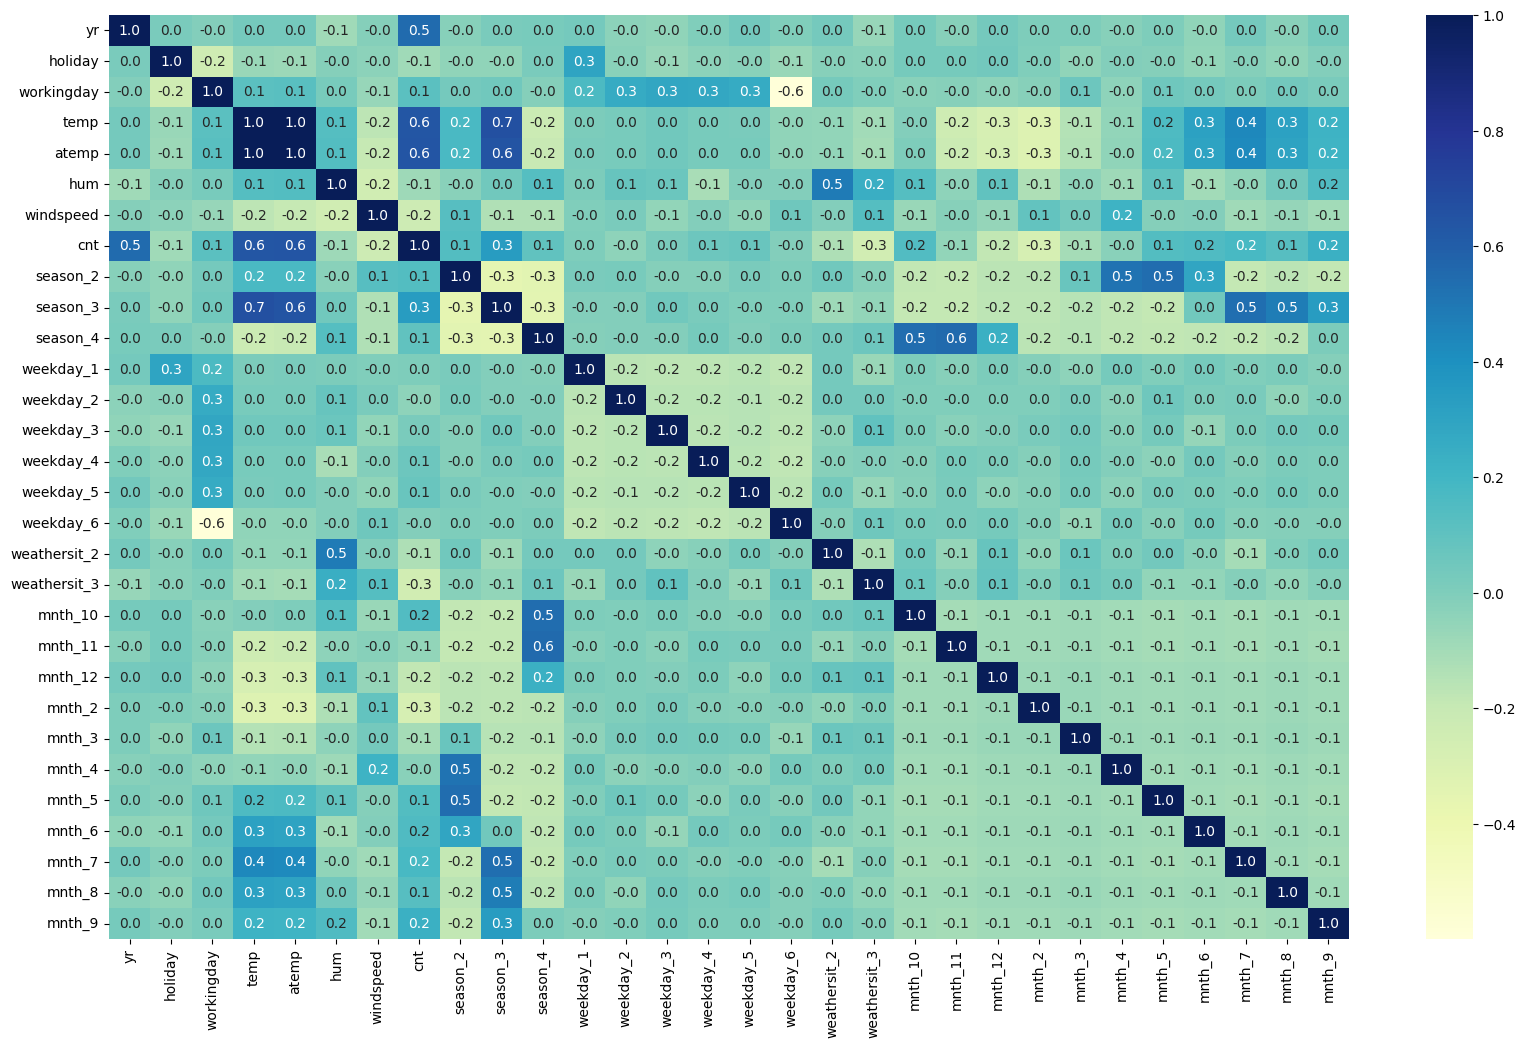

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt=".1f")
plt.show()

- As you might have noticed, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp` vs `cnt`.

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

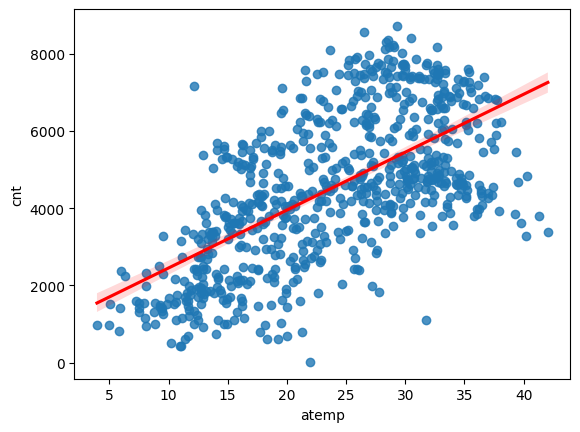

In [65]:
# fitting a regression line using seaborn on the 'temp' column
sns.regplot(data=day, x='atemp', y='cnt', line_kws={'color' : 'r'})

### Dividing into X and Y sets for the model building

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [67]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 6),
 ('weekday_3', False, 13),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 14),
 ('mnth_5', False, 5),
 ('mnth_6', False, 15),
 ('mnth_7', False, 2),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1)]

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_11',
       'mnth_12', 'mnth_3', 'mnth_9'],
      dtype='object')

In [71]:
X_train_rfe = X_train[col]

In [72]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [73]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.35e-187
Time:                        21:11:04   Log-Likelihood:                 489.22
No. Observations:                 510   AIC:                            -946.4
Df Residuals:                     494   BIC:                            -878.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1322      0.032      4.097      0.000       0.069       0.196
yr               0.2364      0.008     27.863      0.000       0.220       0.253
workingday       0.0474      0.011      4.229      0.000       0.025       0.069
atemp            0.4610      0.039     11.876      0.000       0.385       0.537
hum             -0.1548      0.040     -3.886      0.000      -0.233      -0.077
windspeed       -0.1085      0.025     -4.362      0.000      -0.157      -0.060
season_2         0.1626      0.017      9.673      0.000       0.130       0.196
season_3         0.1240      0.022      5.539      0.000       0.080       0.168
season_4         0.2416      0.017     14.050      0.000       0.208       0.275
weekday_6        0.0556      0.015      3.799      0.000       0.027       0.084
weathersit_2    -0.0589      0.011     -5.333      0.000      -0.081      -0.037
weathersit_3    -0.2291      0.028     -8.107      0.000      -0.285      -0.174
mnth_11         -0.0796      0.019     -4.143      0.000      -0.117      -0.042
mnth_12         -0.0621      0.018     -3.429      0.001      -0.098      -0.027
mnth_3           0.0460      0.018      2.523      0.012       0.010       0.082
mnth_9           0.0820      0.016      5.080      0.000       0.050       0.114
==============================================================================
Omnibus:                       86.341   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.741
Skew:                          -0.899   Prob(JB):                     1.40e-42
Kurtosis:                       5.417   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that all the variables are significant since the p-value for each is less than 0.05 (5%).

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.28
3,hum,18.06
6,season_3,7.43
4,windspeed,4.70
1,workingday,4.49
7,season_4,4.26
5,season_2,4.15
9,weathersit_2,2.11
0,yr,2.06
11,mnth_11,1.92


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high VIF of `26.28`. Let's go ahead and drop this variables

In [76]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

In [77]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [78]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.71e-161
Time:                        21:11:31   Log-Likelihood:                 425.17
No. Observations:                 510   AIC:                            -820.3
Df Residuals:                     495   BIC:                            -756.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2257      0.035      6.366      0.000       0.156       0.295
yr               0.2438      0.010     25.440      0.000       0.225       0.263
workingday       0.0566      0.013      4.474      0.000       0.032       0.081
hum             -0.0690      0.044     -1.556      0.120      -0.156       0.018
windspeed       -0.1382      0.028     -4.929      0.000      -0.193      -0.083
season_2         0.2976      0.014     21.210      0.000       0.270       0.325
season_3         0.3365      0.015     22.081      0.000       0.307       0.366
season_4         0.3450      0.017     20.544      0.000       0.312       0.378
weekday_6        0.0531      0.017      3.203      0.001       0.021       0.086
weathersit_2    -0.0782      0.012     -6.322      0.000      -0.102      -0.054
weathersit_3    -0.2836      0.032     -8.980      0.000      -0.346      -0.222
mnth_11         -0.1480      0.021     -7.131      0.000      -0.189      -0.107
mnth_12         -0.1136      0.020     -5.699      0.000      -0.153      -0.074
mnth_3           0.0515      0.021      2.494      0.013       0.011       0.092
mnth_9           0.0593      0.018      3.266      0.001       0.024       0.095
==============================================================================
Omnibus:                       72.832   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.715
Skew:                          -0.746   Prob(JB):                     1.90e-38
Kurtosis:                       5.439   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,12.33
3,windspeed,4.68
1,workingday,4.39
6,season_4,3.14
5,season_3,2.65
4,season_2,2.23
0,yr,2.02
8,weathersit_2,1.97
7,weekday_6,1.77
10,mnth_11,1.77


As we can see from both, the summary as well as VIF values, `hum` is the most insignificant columns. Hence we drop it.

In [80]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [81]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [82]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.55e-162
Time:                        21:11:49   Log-Likelihood:                 423.93
No. Observations:                 510   AIC:                            -819.9
Df Residuals:                     496   BIC:                            -760.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1799      0.020      9.074      0.000       0.141       0.219
yr               0.2458      0.010     25.831      0.000       0.227       0.264
workingday       0.0572      0.013      4.518      0.000       0.032       0.082
windspeed       -0.1246      0.027     -4.670      0.000      -0.177      -0.072
season_2         0.2954      0.014     21.129      0.000       0.268       0.323
season_3         0.3338      0.015     22.013      0.000       0.304       0.364
season_4         0.3415      0.017     20.488      0.000       0.309       0.374
weekday_6        0.0539      0.017      3.246      0.001       0.021       0.087
weathersit_2    -0.0891      0.010     -8.734      0.000      -0.109      -0.069
weathersit_3    -0.3033      0.029    -10.462      0.000      -0.360      -0.246
mnth_11         -0.1465      0.021     -7.056      0.000      -0.187      -0.106
mnth_12         -0.1145      0.020     -5.736      0.000      -0.154      -0.075
mnth_3           0.0533      0.021      2.585      0.010       0.013       0.094
mnth_9           0.0561      0.018      3.105      0.002       0.021       0.092
==============================================================================
Omnibus:                       72.537   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.893
Skew:                          -0.743   Prob(JB):                     2.86e-38
Kurtosis:                       5.435   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.89
1,workingday,3.72
5,season_4,2.68
4,season_3,2.15
0,yr,1.99
3,season_2,1.95
9,mnth_11,1.77
6,weekday_6,1.64
7,weathersit_2,1.57
12,mnth_9,1.31


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

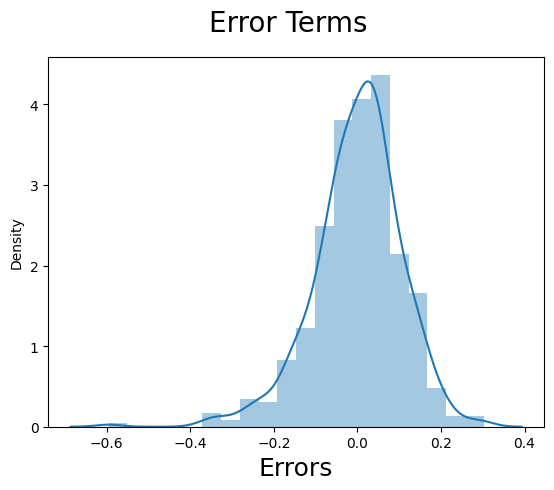

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Following the assumptions of Linear Regression, we can see from the above plot that the mean of residuals is 0 and it follows are a normal distribution.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [86]:
cols_to_use = X_train_rfe.columns

In [87]:
cols_to_use

Index(['yr', 'workingday', 'windspeed', 'season_2', 'season_3', 'season_4',
       'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_11', 'mnth_12',
       'mnth_3', 'mnth_9'],
      dtype='object')

In [88]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,19.780141,0.501760,0.629546,0.435511,0.479553,0.237443,0.251142,...,0.059361,0.109589,0.082192,0.136986,0.073059,0.068493,0.077626,0.068493,0.109589,0.063927
std,0.498836,0.176306,0.451539,7.565815,0.215759,0.152584,0.212750,0.233091,0.426491,0.434663,...,0.236840,0.313092,0.275286,0.344621,0.260830,0.253169,0.268194,0.253169,0.313092,0.245183
min,0.000000,0.000000,0.000000,3.993043,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.085847,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,19.133347,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.325403,0.685028,0.735901,0.534288,0.644151,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.371653,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
# Adding constant variable to test dataframe
X_test = X_test[cols_to_use]

In [92]:
X_test.head()

,yr,workingday,windspeed,season_2,season_3,season_4,weekday_6,weathersit_2,weathersit_3,mnth_11,mnth_12,mnth_3,mnth_9
468,1,0,0.422104,1,0,0,1,0,0,0,0,0,0
148,0,0,0.479765,1,0,0,0,0,0,0,0,0,0
302,0,0,0.386287,0,0,1,0,0,0,0,0,0,0
355,0,1,0.062325,0,0,0,0,1,0,0,1,0,0
515,1,1,0.433030,1,0,0,0,0,0,0,0,0,0


In [93]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,yr,workingday,windspeed,season_2,season_3,season_4,weekday_6,weathersit_2,weathersit_3,mnth_11,mnth_12,mnth_3,mnth_9
468,1.0,1,0,0.422104,1,0,0,1,0,0,0,0,0,0
148,1.0,0,0,0.479765,1,0,0,0,0,0,0,0,0,0
302,1.0,0,0,0.386287,0,0,1,0,0,0,0,0,0,0
355,1.0,0,1,0.062325,0,0,0,0,1,0,0,1,0,0
515,1.0,1,1,0.433030,1,0,0,0,0,0,0,0,0,0


In [94]:
# Making predictions using the fourth model

y_pred = lr.predict(X_test)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

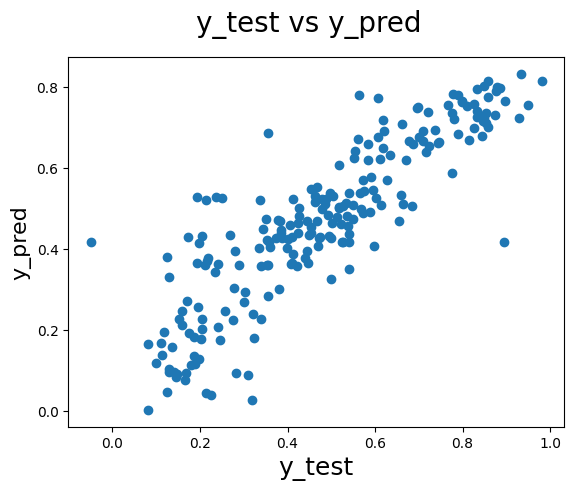

In [109]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [111]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11532796268523159

In [112]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7540736598424601

In [113]:
X_t=X_train_rfe.iloc[:,0].values

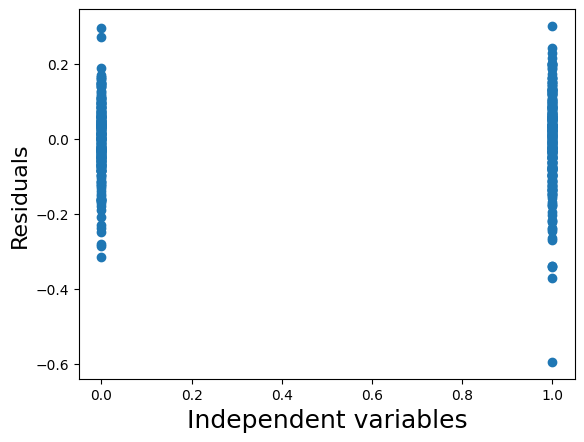

In [114]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t, y_train - y_train_pred)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

We can see that residuals don't follow a pattern, hence, they have constant variance.

In [115]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.55e-162
Time:                        21:17:06   Log-Likelihood:                 423.93
No. Observations:                 510   AIC:                            -819.9
Df Residuals:                     496   BIC:                            -760.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1799      0.020      9.074      0.000       0.141       0.219
yr               0.2458      0.010     25.831      0.000       0.227       0.264
workingday       0.0572      0.013      4.518      0.000       0.032       0.082
windspeed       -0.1246      0.027     -4.670      0.000      -0.177      -0.072
season_2         0.2954      0.014     21.129      0.000       0.268       0.323
season_3         0.3338      0.015     22.013      0.000       0.304       0.364
season_4         0.3415      0.017     20.488      0.000       0.309       0.374
weekday_6        0.0539      0.017      3.246      0.001       0.021       0.087
weathersit_2    -0.0891      0.010     -8.734      0.000      -0.109      -0.069
weathersit_3    -0.3033      0.029    -10.462      0.000      -0.360      -0.246
mnth_11         -0.1465      0.021     -7.056      0.000      -0.187      -0.106
mnth_12         -0.1145      0.020     -5.736      0.000      -0.154      -0.075
mnth_3           0.0533      0.021      2.585      0.010       0.013       0.094
mnth_9           0.0561      0.018      3.105      0.002       0.021       0.092
==============================================================================
Omnibus:                       72.537   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.893
Skew:                          -0.743   Prob(JB):                     2.86e-38
Kurtosis:                       5.435   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


We can see that the equation of our best fitted line is:

$ cnt = 0.1799 \times const + 0.2458  \times  yr + 0.0572  \times  workingday - 0.1246 \times windspeed + 0.2954 \times season\_2 + 0.3338 \times season\_3 + 0.3415 \times season\_4 + 0.0539 \times weekday\_6 - 0.0891 \times weathersit\_2 - 0.3033 \times weathersit\_3 - 0.1465 \times mnth\_11 - 0.1145 \times mnth\_12 + 0.0533 \times mnth\_3 + 0.0561 \times mnth\_9 $


- As seen from the summary, `season_2`, `season_3` and `season_4` have the strongest positive influence whereas `windspeed`, `weathersit_3` and `mnth_11` have the strongest negative influence.
- The final selected variables explain around 80% of the total variance.

### Recommendations
1. Focus on understanding and leveraging the factors associated with the year to enhance bike usage.
2. Pay attention to weather conditions, especially high wind speeds, and provide alternative transportation options on such days.
3. Consider implementing strategies to mitigate the impact of adverse weather conditions on bike rentals, such as offering discounts during poor weather.
4. Capitalize on the seasonal patterns by implementing season-specific promotions or events to boost bike rentals during these times.